In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# convert the string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

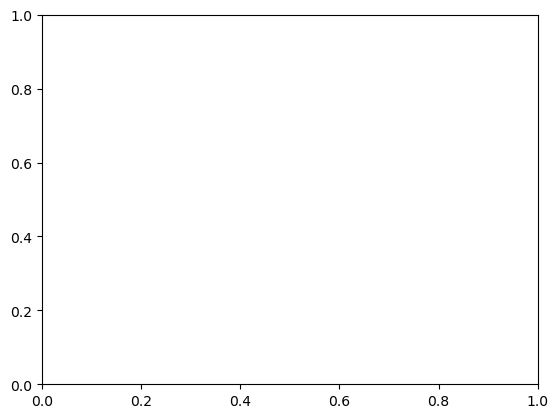

In [8]:
fig, ax = plt.subplots()

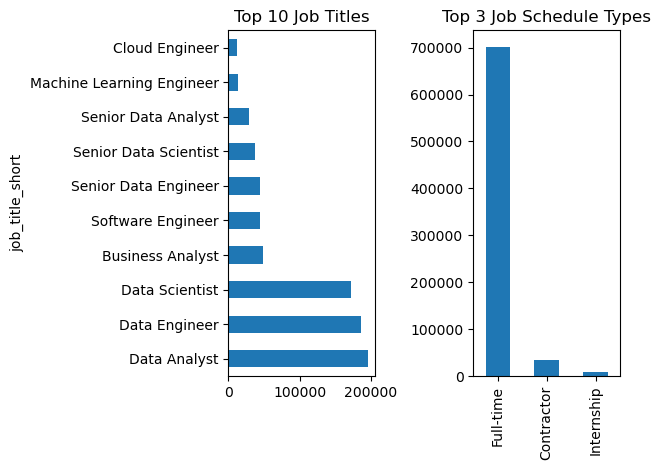

In [21]:
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='barh', ax=ax[0], title='Top 10 Job Titles', xlabel='')
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1], title='Top 3 Job Schedule Types', xlabel='')

fig.tight_layout()

In [29]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size() #return series
df_skills_count = skills_count.reset_index(name='skills_count') #convert series to dataframe
df_skills_count.sort_values(by='skills_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skills_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


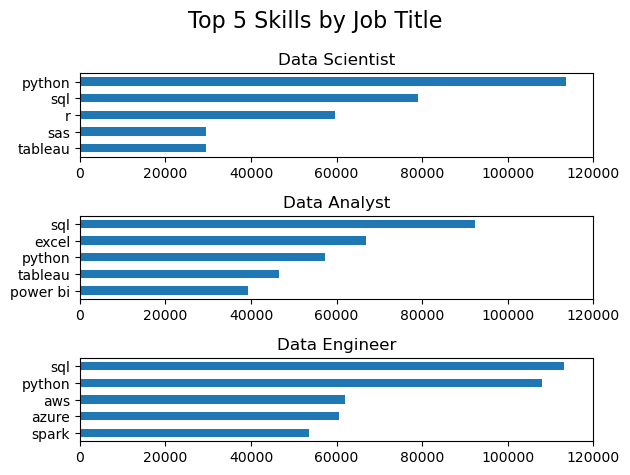

In [46]:
job_title = ['Data Scientist', 'Data Analyst', 'Data Engineer']

fig, ax = plt.subplots(3, 1)

for i, title in enumerate(job_title): #enumerate to get index
  df_plot = df_skills_count[df_skills_count['job_title_short'] == title].head(5) #filtering the dataframe based on job title
  df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax=ax[i], title=title, legend=False, xlabel='') #legend false to hide legend
  ax[i].invert_yaxis() #to make the highest value on top of the chart
  ax[i].set_ylabel('')
  ax[i].set_xlim(0, 120_000)
  # ax[i].set_xlim(0, df_skills_count['skills_count'].max() + 10) #set x limit to make the chart more readable
  
fig.suptitle('Top 5 Skills by Job Title', fontsize=16)
fig.tight_layout()